In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sys
from datetime import datetime, timedelta
s = datetime.now().strftime("%Y-%m-%d")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.float_format = '{:,.5f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df_data = pd.read_csv(r"C:

C:\Aplikacijas\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking if data have nan values;
df_data1=df_data.isnull().mean().sort_values(ascending=False)
df_data1.head(50)

member_id                                    1.00000
desc                                         1.00000
orig_projected_additional_accrued_interest   0.99677
hardship_dpd                                 0.99592
hardship_start_date                          0.99592
hardship_end_date                            0.99592
payment_plan_start_date                      0.99592
hardship_length                              0.99592
hardship_loan_status                         0.99592
hardship_payoff_balance_amount               0.99592
deferral_term                                0.99592
hardship_last_payment_amount                 0.99592
hardship_status                              0.99592
hardship_reason                              0.99592
hardship_type                                0.99592
hardship_amount                              0.99592
settlement_percentage                        0.99284
settlement_term                              0.99284
debt_settlement_flag_date                    0

In [4]:
#Droping columns with a lot of 'nan' data;
drop_list = list(df_data1[df_data1 > 0.3].index)
print(drop_list)

['member_id', 'desc', 'orig_projected_additional_accrued_interest', 'hardship_dpd', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'deferral_term', 'hardship_last_payment_amount', 'hardship_status', 'hardship_reason', 'hardship_type', 'hardship_amount', 'settlement_percentage', 'settlement_term', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'sec_app_mths_since_last_major_derog', 'mths_since_last_record', 'verification_status_joint', 'sec_app_revol_util', 'sec_app_fico_range_high', 'sec_app_collections_12_mths_ex_med', 'dti_joint', 'annual_inc_joint', 'revol_bal_joint', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_fico_range_low', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_rec

In [5]:
df_data.shape

(130774, 150)

In [6]:
df_data.drop(labels=drop_list, axis=1, inplace=True)
df_data.shape

(130774, 106)

In [7]:
df_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,134988374,"20,000.00000","20,000.00000","20,000.00000",36 months,7.46%,621.76000,A,A4,Nurse Practitioner,2 years,MORTGAGE,"150,000.00000",Source Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,793xx,TX,23.19000,1.00000,Sep-1996,720.00000,724.00000,1.00000,22.00000,0.00000,"21,860.00000",52.4%,61.00000,w,"10,981.47000","10,981.47000","10,678.70000","10,678.70000","9,018.53000","1,660.17000",0.00000,0.00000,0.00000,Nov-2019,621.76000,Nov-2019,774.00000,770.00000,0.00000,1.00000,Individual,0.00000,96.00000,"261,679.00000",4.00000,4.00000,1.00000,3.00000,1.00000,"119,600.00000",70.00000,4.00000,7.00000,"6,670.00000",63.00000,"41,700.00000",1.00000,0.00000,1.00000,10.00000,"11,895.00000","8,783.00000",61.50000,0.00000,0.00000,201.00000,261.00000,2.00000,1.00000,2.00000,3.00000,5.00000,0.00000,7.00000,11.00000,9.00000,13.00000,34.00000,17.00000,25.00000,11.00000,22.00000,0.00000,0.00000,0.00000,5.00000,95.00000,33.30000,0.00000,0.00000,"315,217.00000","141,460.00000","22,800.00000","136,053.00000",N,N
1,135249858,"9,500.00000","9,500.00000","9,500.00000",36 months,16.46%,336.16000,C,C5,NaN,NaN,RENT,"41,000.00000",Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,moving,Moving and relocation,105xx,NY,18.71000,0.00000,Jun-2006,695.00000,699.00000,1.00000,3.00000,0.00000,177.00000,8.9%,5.00000,w,"5,588.86000","5,588.86000","5,697.35000","5,697.35000","3,911.14000","1,786.21000",0.00000,0.00000,0.00000,Nov-2019,336.16000,Nov-2019,689.00000,685.00000,0.00000,1.00000,Individual,0.00000,0.00000,"27,128.00000",0.00000,1.00000,0.00000,1.00000,17.00000,"26,951.00000",84.00000,0.00000,2.00000,147.00000,79.00000,"2,000.00000",6.00000,0.00000,2.00000,3.00000,"9,043.00000","1,823.00000",8.90000,0.00000,0.00000,111.00000,144.00000,19.00000,17.00000,0.00000,19.00000,0.00000,0.00000,2.00000,2.00000,2.00000,3.00000,2.00000,2.00000,3.00000,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,80.00000,0.00000,0.00000,0.00000,"34,165.00000","27,128.00000","2,000.00000","32,165.00000",N,N
2,135881014,"11,200.00000","11,200.00000","11,200.00000",60 months,28.72%,353.61000,F,F1,Cashier,2 years,RENT,"31,000.00000",Source Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,337xx,FL,4.07000,1.00000,Jan-2007,680.00000,684.00000,0.00000,9.00000,0.00000,"1,666.00000",26%,14.00000,w,"9,430.76000","9,430.76000","5,975.63000","5,975.63000","1,769.24000","4,206.39000",0.00000,0.00000,0.00000,N

In [8]:
#There is a lot of data that is not know at the moment of the loan application moment;
#That kind of data will not be used;
#Except info added by LendindClub at that application moment moment;
df_data2=df_data[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment',
  'grade','sub_grade','issue_d','loan_status','purpose','title','initial_list_status',
                  'application_type','emp_title','emp_length','home_ownership',
                  'annual_inc','verification_status','zip_code','addr_state','dti',
                  'earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc',
                   'pub_rec_bankruptcies',]]


In [9]:
#need to understand if columns columns - "loan_amnt","funded_amnt","funded_amnt_inv" are equal
df_data2.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.00000,1.00000,1.00000,0.94548,0.22917,0.04762,0.16169,-0.03521,0.27924,0.17749,0.19568,-0.04594
funded_amnt,1.00000,1.00000,1.00000,0.94548,0.22917,0.04762,0.16169,-0.03521,0.27924,0.17749,0.19568,-0.04594
funded_amnt_inv,1.00000,1.00000,1.00000,0.94540,0.22918,0.04762,0.16167,-0.03525,0.27923,0.17749,0.19572,-0.04598
installment,0.94548,0.94548,0.94540,1.00000,0.22189,0.05672,0.15677,-0.03002,0.27565,0.15759,0.15509,-0.04154
annual_inc,0.22917,0.22917,0.22918,0.22189,1.00000,-0.10781,0.13950,-0.00834,0.23706,0.16200,0.17931,-0.02069
dti,0.04762,0.04762,0.04762,0.05672,-0.10781,1.00000,0.16249,-0.00193,0.11087,0.14229,0.02616,0.00306
open_acc,0.16169,0.16169,0.16167,0.15677,0.13950,0.16249,1.00000,0.01339,0.25638,0.74774,0.16642,0.01667
pub_rec,-0.03521,-0.03521,-0.03525,-0.03002,-0.00834,-0.00193,0.01339,1.00000,-0.07157,0.00610,-0.04408,0.91304
revol_bal,0.27924,0.27924,0.27923,0.27565,0.23706,0.11087,0.25638,-0.07157,1.00000,0.22884,0.22032,-0.07974
total_acc,0.17749,0.17749,0.17749,0.15759,0.16200,0.14229,0.74774,0.00610,0.22884,1.00000,0.36412,0.01190


In [10]:
#Those 3 columns have the same info
#Will keep only one - "loan_amount" (dictonary says - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
df_data3=df_data2[['id','loan_amnt','term','int_rate','installment',
  'grade','sub_grade','issue_d','loan_status','purpose','title','initial_list_status',
                  'application_type','emp_title','emp_length','home_ownership',
                  'annual_inc','verification_status','zip_code','addr_state','dti',
                  'earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc',
                   'pub_rec_bankruptcies',]]


In [11]:
#Checking if all IDs are unique
df_data3['id'].describe()

count        130774
unique       130774
top       132907001
freq              1
Name: id, dtype: int64

In [12]:
df_data3['loan_status'].value_counts(dropna=False)

Current               85080
Fully Paid            31554
Charged Off            9995
Late (31-120 days)     2876
In Grace Period         790
Late (16-30 days)       474
Default                   3
NaN                       2
Name: loan_status, dtype: int64

In [13]:
# replacing "loan_status" values
df_data3['loan_status'] = df_data3['loan_status'].replace({'Late (16-30 days)':'non-performing', 
                                                   'Late (31-120 days)':'non-performing',  
                                                  'Default':'non-performing',
                                                  'Charged Off':'non-performing',
                                                 
                                                'Current':'performing', 
                                               'Fully Paid':'performing',  
                                              'In Grace Period':'performing'})

C:\Aplikacijas\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
df_data3['loan_status'].value_counts(dropna=False)

performing        117424
non-performing     13348
NaN                    2
Name: loan_status, dtype: int64

In [15]:
##################################
#Create a chart which displays issued loans month, loan type.

Text(0.5, 1.0, 'Issued loans by issue month')

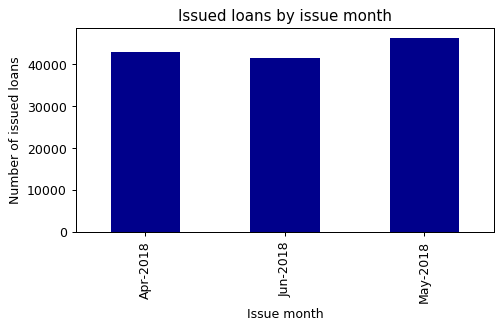

In [16]:
plt.figure(figsize=(6,3), dpi=90)
df_data3['issue_d'].value_counts().sort_index().plot.bar(color='darkblue')

plt.xlabel('Issue month')
plt.ylabel('Number of issued loans')
plt.title('Issued loans by issue month')

Text(0.5, 1.0, 'Issued loans by loan type')

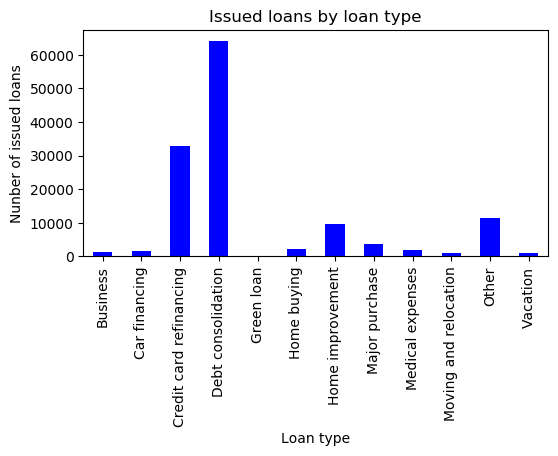

In [17]:
plt.figure(figsize=(6,3), dpi=100)
df_data3['title'].value_counts().sort_index().plot.bar(color='blue')
plt.xlabel('Loan type')
plt.ylabel('Nunber of issued loans')
plt.title('Issued loans by loan type')

In [18]:
#############################

In [19]:
#Do some analysis and 
#suggest some variables which would help to 
#identify non-performin loans based on a set of variables! (2018.05)

In [21]:
#Choose 3 types of loans (by title) and do some explotary data analysis;

df_loan=df_data3[df_data3['title'].isin(['Home buying','Car financing','Medical expenses'])]
df_loan.shape

(5723, 29)

In [22]:
df_loan['title'].value_counts(dropna=False)

Home buying         2240
Medical expenses    1958
Car financing       1525
Name: title, dtype: int64

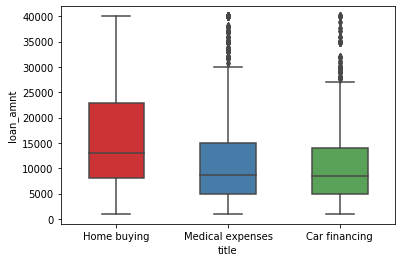

In [23]:
bplot = sns.boxplot(y='loan_amnt', x='title', 
                 data=df_loan, 
                 width=0.5,
                 palette="Set1")

In [24]:
df_loan.groupby('title')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Car financing,"1,525.00000","10,414.01639","7,490.93945","1,000.00000","5,000.00000","8,400.00000","14,000.00000","40,000.00000"
Home buying,"2,240.00000","16,195.65848","10,630.12278","1,000.00000","8,000.00000","13,000.00000","22,800.00000","40,000.00000"
Medical expenses,"1,958.00000","11,403.62615","9,203.66613","1,000.00000","5,000.00000","8,750.00000","15,000.00000","40,000.00000"


In [25]:
df_loan.groupby('title')['term'].describe()

,count,unique,top,freq
title,,,,
Car financing,1525,2,36 months,1184
Home buying,2240,2,36 months,1529
Medical expenses,1958,2,36 months,1516


In [26]:
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'])
df_loan=df_loan.sort_values(['title','issue_d'],ascending=[True,True])
df_loan.groupby(['title','issue_d'])['loan_amnt'].sum().reset_index()

C:\Aplikacijas\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,issue_d,loan_amnt
0,Car financing,2018-04-01,"5,347,425.00000"
1,Car financing,2018-05-01,"5,827,825.00000"
2,Car financing,2018-06-01,"4,706,125.00000"
3,Home buying,2018-04-01,"12,637,700.00000"
4,Home buying,2018-05-01,"12,688,625.00000"
5,Home buying,2018-06-01,"10,951,950.00000"
6,Medical expenses,2018-04-01,"7,724,025.00000"
7,Medical expenses,2018-05-01,"8,173,125.00000"
8,Medical expenses,2018-06-01,"6,431,150.00000"


In [27]:
df_loan.groupby(['title'])['loan_amnt'].sum().reset_index()

,title,loan_amnt
0,Car financing,"15,881,375.00000"
1,Home buying,"36,278,275.00000"
2,Medical expenses,"22,328,300.00000"


In [28]:
#############################

In [29]:
#Do some analysis and suggest some variables which would help to indetify non-performing loans (2018.05)

In [30]:
df_data4=df_data3[df_data3['issue_d'].isin(['May-2018'])]
df_data4['issue_d'].value_counts(dropna=False)

May-2018    46311
Name: issue_d, dtype: int64

In [31]:
df_data4['loan_status'].value_counts(dropna=False)

performing        41477
non-performing     4834
Name: loan_status, dtype: int64

In [32]:
# a lot more data is about performing loans. 
# in this case we will balance the sample.
# so we can compare clients with performin and non-performing loans.

df_data5=df_data4[df_data4['loan_status'].isin(['non-performing'])]
df_data6=df_data4[df_data4['loan_status'].isin(['performing'])]
df_data7=df_data6.sample(n = 4834) 
df_data8=pd.concat([df_data5,df_data7])

df_data8['loan_status'].value_counts(dropna=False)

non-performing    4834
performing        4834
Name: loan_status, dtype: int64

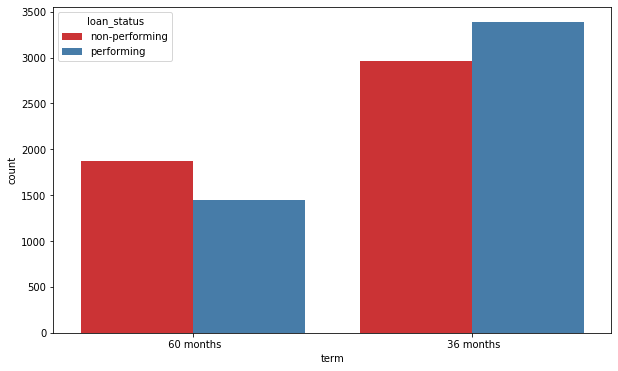

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='term', hue='loan_status', data=df_data8,palette='Set1')

In [34]:
#Plot shows that clients with term=60 are more likely to have non-performing loan;

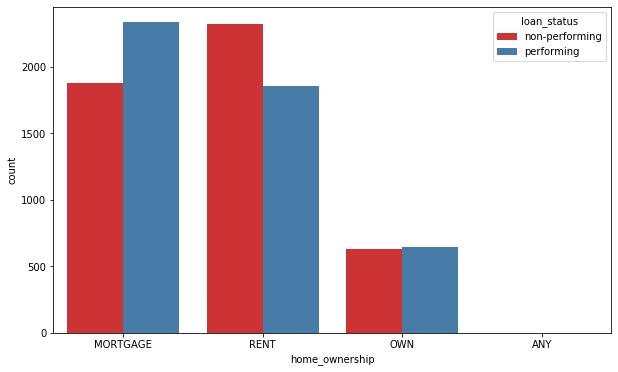

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_data8,palette='Set1')

In [36]:
#Plot shows that we can se that clients who rent their homes are more likely to have non-performing loan;

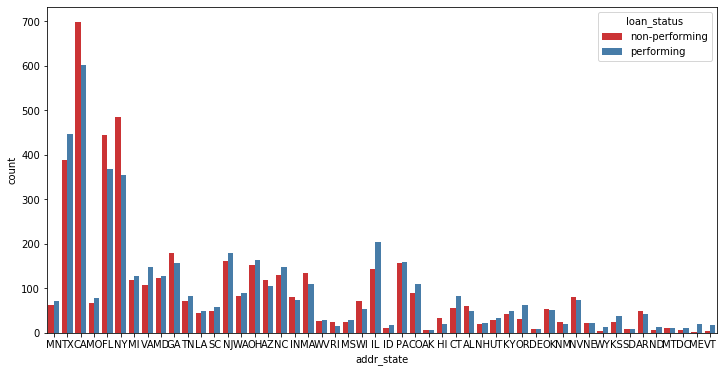

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='addr_state', hue='loan_status', data=df_data8,palette='Set1')

In [38]:
#we can see some quite significant differences, so addr_state also is significant factor for non-performing loans;

In [39]:
##################################

In [40]:
#prepare some model of any kind to predict non-perfromin loands based on a set of variables

#balancing Label data

In [41]:
df_model=df_data3[df_data3['loan_status'].isin(['non-performing'])]
df_model1=df_data3[df_data3['loan_status'].isin(['performing'])]

In [42]:
df_model['loan_status'].value_counts(dropna=False)

non-performing    13348
Name: loan_status, dtype: int64

In [43]:
df_model1['loan_status'].value_counts(dropna=False)

performing    117424
Name: loan_status, dtype: int64

In [44]:
df_model2=df_model1.sample(n = 13348) 

df_model3=pd.concat([df_model,df_model2])

df_model3['loan_status'].value_counts(dropna=False)

non-performing    13348
performing        13348
Name: loan_status, dtype: int64

In [45]:
df_model3.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,issue_d,loan_status,purpose,title,initial_list_status,application_type,emp_title,emp_length,home_ownership,annual_inc,verification_status,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
41,135976116,"30,000.00000",60 months,21.85%,826.02000,D,D5,Jun-2018,non-performing,credit_card,Credit card refinancing,w,Individual,Supervising Police Radio Dispatcher,10+ years,MORTGAGE,"56,808.00000",Verified,967xx,HI,24.74000,Oct-2004,6.00000,0.00000,"61,314.00000",96.2%,10.00000,1.00000,0.00000
42,136055010,"20,000.00000",60 months,26.77%,607.97000,E,E5,Jun-2018,non-performing,debt_consolidation,Debt consolidation,w,Individual,HRSS,10+ years,MORTGAGE,"65,000.00000",Source Verified,301xx,GA,35.41000,Mar-2003,8.00000,1.00000,"13,796.00000",77.5%,22.00000,2.00000,1.00000
51,135473151,"6,000.00000",36 months,16.46%,212.31000,C,C5,Jun-2018,non-performing,debt_consolidation,Debt consolidation,w,Individual,NaN,NaN,OWN,"20,388.00000",Source Verified,321xx,FL,16.66000,Jan-2006,6.00000,0.00000,"6,103.00000",75.3%,7.00000,0.00000,0.00000
57,135850558,"21,000.00000",60 months,20.39%,560.94000,D,D4,Jun-2018,non-performing,debt_consolidation,Debt consolidation,w,Individual,General Manager,< 1 year,MORTGAGE,"125,000.00000",Source Verified,853xx,AZ,11.54000,Mar-1995,6.00000,0.00000,"6,514.00000",65.8%,10.00000,2.00000,0.00000
64,136010056,"15,000.00000",36 months,14.03%,512.89000,C,C2,Jun-2018,non-performing,debt_consolidation,Debt consolidation,w,Individual,Teacher,5 years,MORTGAGE,"67,403.00000",Not Verified,705xx,LA,25.23000,Apr-1990,7.00000,0.00000,"12,908.00000",69.7%,39.00000,0.00000,0.00000


In [46]:
df_model3['loan_status'] = df_model3['loan_status'].replace({'non-performing':1, 
                                                    'performing':0})
df_model3['loan_status'] =df_model3['loan_status'].astype(np.uint8)

In [47]:
df_model3['loan_status'].value_counts(dropna=False)

1    13348
0    13348
Name: loan_status, dtype: int64

In [48]:
df_model4 = df_model3[['loan_status','loan_amnt', 'dti','annual_inc','home_ownership','term']]
df_model4.head()

,loan_status,loan_amnt,dti,annual_inc,home_ownership,term
41,1,"30,000.00000",24.74000,"56,808.00000",MORTGAGE,60 months
42,1,"20,000.00000",35.41000,"65,000.00000",MORTGAGE,60 months
51,1,"6,000.00000",16.66000,"20,388.00000",OWN,36 months
57,1,"21,000.00000",11.54000,"125,000.00000",MORTGAGE,60 months
64,1,"15,000.00000",25.23000,"67,403.00000",MORTGAGE,36 months


In [49]:
df_model4.head()

,loan_status,loan_amnt,dti,annual_inc,home_ownership,term
41,1,"30,000.00000",24.74000,"56,808.00000",MORTGAGE,60 months
42,1,"20,000.00000",35.41000,"65,000.00000",MORTGAGE,60 months
51,1,"6,000.00000",16.66000,"20,388.00000",OWN,36 months
57,1,"21,000.00000",11.54000,"125,000.00000",MORTGAGE,60 months
64,1,"15,000.00000",25.23000,"67,403.00000",MORTGAGE,36 months


In [50]:
df_model5 = pd.get_dummies(df_model4, columns=['home_ownership','term'], drop_first=True)
df_model5.head()

,loan_status,loan_amnt,dti,annual_inc,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,term_ 60 months
41,1,"30,000.00000",24.74000,"56,808.00000",1,0,0,1
42,1,"20,000.00000",35.41000,"65,000.00000",1,0,0,1
51,1,"6,000.00000",16.66000,"20,388.00000",0,1,0,0
57,1,"21,000.00000",11.54000,"125,000.00000",1,0,0,1
64,1,"15,000.00000",25.23000,"67,403.00000",1,0,0,0


In [51]:
#Checking data with a lot of nan values;
df_model5.isnull().mean().sort_values(ascending=False)

dti                       0.00318
term_ 60 months           0.00000
home_ownership_RENT       0.00000
home_ownership_OWN        0.00000
home_ownership_MORTGAGE   0.00000
annual_inc                0.00000
loan_amnt                 0.00000
loan_status               0.00000
dtype: float64

In [52]:
df_model5['dti'] = df_model5['dti'].fillna(0)

In [53]:
#df_data9.to_clipboard()

In [54]:
df_model5.dtypes

loan_status                  uint8
loan_amnt                  float64
dti                        float64
annual_inc                 float64
home_ownership_MORTGAGE      uint8
home_ownership_OWN           uint8
home_ownership_RENT          uint8
term_ 60 months              uint8
dtype: object

In [55]:
df_model5['loan_amnt'] =df_model5['loan_amnt'].astype(str)
df_model5['dti'] =df_model5['dti'].astype(str)
df_model5['annual_inc'] =df_model5['annual_inc'].astype(str)
df_model5.dtypes

loan_status                 uint8
loan_amnt                  object
dti                        object
annual_inc                 object
home_ownership_MORTGAGE     uint8
home_ownership_OWN          uint8
home_ownership_RENT         uint8
term_ 60 months             uint8
dtype: object

In [56]:
df_model5.head()

,loan_status,loan_amnt,dti,annual_inc,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,term_ 60 months
41,1,30000.0,24.74,56808.0,1,0,0,1
42,1,20000.0,35.41,65000.0,1,0,0,1
51,1,6000.0,16.66,20388.0,0,1,0,0
57,1,21000.0,11.54,125000.0,1,0,0,1
64,1,15000.0,25.23,67403.0,1,0,0,0


In [57]:
#Splitting data into features and Label (1 - "non-perfoming"):

features = df_model5.iloc[:,[1, 2, 3, 4, 5, 6,7]].values
labels = df_model5.iloc[:,0].values

In [58]:
#Splitting dataset into training (model training) and testing data (model validation);

features_trn, features_tst, labels_trn, labels_tst = train_test_split(features, labels, test_size = .1, random_state=1)

In [59]:
#Using model DecisionTreeClassifier for the training data
dt = tree.DecisionTreeClassifier()
dt.fit(features_trn, labels_trn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
#Using model for the testing set
#and comparing the results with the historical data

dt_labels_prd = dt.predict(features_tst)
accuracy_score(labels_tst, dt_labels_prd)

0.5318352059925093

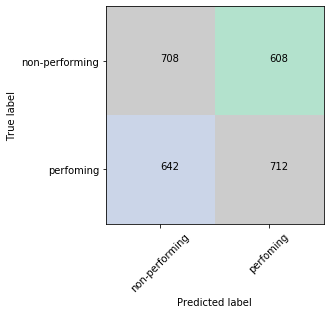

In [61]:
#confusion matrix gives additional view to the result

cm = confusion_matrix(dt_labels_prd, labels_tst)

def plot_and_display_confusion_matrix(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    classNames = ['non-performing','perfoming']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
plot_and_display_confusion_matrix(cm)